<a href="https://colab.research.google.com/github/mafiTec/Natural-Language-Processing/blob/main/NLP_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import numpy as np
import pandas as pd

In [151]:
df = pd.read_csv('/content/drive/MyDrive/NLP/FakeNews.csv',encoding = 'unicode_escape')
df = df[ :5000]
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [152]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [153]:
df.shape

(5000, 5)

In [154]:
#Printing Dimension of datasets

print("Dimension of dataset:", df.shape)
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Dimension of dataset: (5000, 5)
Number of rows in the dataset: 5000
Number of columns in the dataset: 5


In [155]:
# printing attributes (columns) name

print("Column Names:",df.columns.values)

Column Names: ['id' 'title' 'author' 'text' 'label']


In [156]:
# Showing datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   title   4858 non-null   object
 2   author  4522 non-null   object
 3   text    4989 non-null   object
 4   label   5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [157]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

id          0
title     142
author    478
text       11
label       0
dtype: int64

In [158]:
#Dropping null values

df=df.dropna()
df = df.reset_index(drop = True)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [159]:
#data points for each class
df.label.value_counts()

0    2462
1    1918
Name: label, dtype: int64

In [129]:
#for column in df2.columns:
    #print(column,df2[column].nunique())

id 4380
title 4355
author 1606
text 4341
label 2


In [130]:
#df['label'].nunique()

2

In [90]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()

In [91]:
#df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4].values)

In [131]:
#df['label'].value_counts()

1    2532
0    2468
Name: label, dtype: int64

In [160]:
#Count plot for Species
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


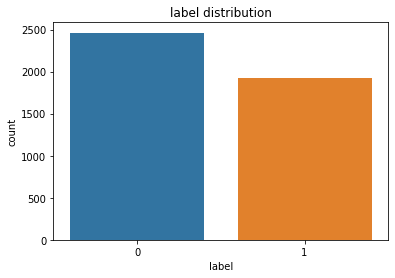

In [161]:
sns.countplot('label',data= df)
plt.title("label distribution")
plt.show()

In [162]:
## Get the Independent Features

X=df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [163]:
## Get the Dependent features

y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [164]:
print("Dimension of dataset after dropping null values:", df.shape)

Dimension of dataset after dropping null values: (4380, 5)


In [165]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [166]:
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed â\x80\x9cno debate so far as I could ascertain as to who their spokesman was to beâ\x80\x9d (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). â\x80\x9cI am very glad that Miss Adams made it clear that what I am speaking for today is all of us â\x80\x94  the 400 of us,â\x80\x9d Miss Rodham told her classmates. After appointing herself Edger

In [139]:
from sklearn.feature_extraction.text import CountVectorizer


In [140]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [167]:
# Cleaning the texts and creat corpus

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [168]:
# Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_cv = cv.fit_transform(corpus).toarray()

In [169]:
df_cv = pd.concat([df2,pd.DataFrame(X_cv)],axis = 1)
df_cv.head()

,id,title,author,text,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
# Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cv.drop(['label'],axis = 1), df_cv['label'], test_size=0.33, random_state=0)

In [171]:
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abund',
 'abus',
 'academ',
 'academi',
 'acceler']

In [172]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [173]:
from sklearn.naive_bayes import MultinomialNB

cv_classifier = MultinomialNB(alpha=0.01)
cv_classifier.fit(X_train.iloc[:,4:], y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [174]:
# Predict Species for test data
pred_cv = cv_classifier.predict(X_test.iloc[:,4:])
pred_cv

array([1, 1, 1, ..., 1, 1, 0])

In [175]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred_cv,y_test)*100,2)))

The accuracy of the Decision Tree is 90.04%


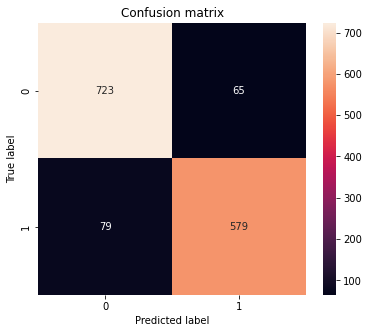

In [179]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm_cv = metrics.confusion_matrix(y_test, pred_cv) 

plt.figure(figsize=(6,5))
sns.heatmap(cm_cv, annot=True,  fmt = 'd')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

In [180]:

labels = pd.DataFrame({"Acutual_label":y_test,"Pred_label":pred_cv})
Output = pd.concat([X_test.iloc[:,:4],labels],axis =1)
Output

,id,title,author,text,Acutual_label,Pred_label
1300,1497,CLINTON CASH 3.0: Chelsea Clinton Being Groome...,Geoffrey Grider,CLINTON CASH 3.0: Chelsea Clinton Being Groo...,1,1
2578,2953,Virgil: The Deep State Strikes Again with Rach...,Virgil,"A few days ago, under the headline, âThe Dep...",0,1
1332,1534,"Not Just Hillary, Entire Obama Administration ...",The Free Thought Project,\nBy Jack Burns\nWikileaks is helping Presiden...,1,1
3669,4198,BREAKING: Honey G Fatally Gunned Down In Bitte...,Colm Williamson,We Use Cookies: Our policy [X] BREAKING: Honey...,1,0
1246,1437,Want to See âHamiltonâ in a City Near You?...,Michael Paulson,"âHamiltonâ is about to hit the road. And, ...",0,0
...,...,...,...,...,...,...
2709,3102,"Iran Warns Trump Over Missile Dispute, and Ame...",Somini Sengupta and Rick Gladstone,UNITED NATIONS â Already furious over Pre...,0,0
385,443,What Does a Trump Victory Mean for Africa?,Patrick Bond,2016 elections by Patrick Bond \nDonald Trump ...,1,1
3193,3669,E-pasaportes: consultora estrella justificÃ³ d...,Herbert Mujica Rojas,SeÃ±al de Alerta\nE-pasaportes: consultora est...,1,1
3755,4293,Dakota Access Announces Plan to Drill Under Mi...,Danny F. Quest,"We Are Change \nOceti Sakowin, ND â As water...",1,1


In [181]:
## TFidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_idf = tfidf_v.fit_transform(corpus).toarray()

In [182]:
df_idf = pd.concat([df2,pd.DataFrame(X_idf)],axis = 1)
df_idf.head()

,id,title,author,text,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035402,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059164,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029240,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021732,0.043767,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.032901,0.033307,0.0,0.04556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.09646,0.0,0.0,0.0,...,0.02129,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011118,0.000000,0.030622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036337,0.034041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056222,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.188789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083359,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_idf.drop(['label'],axis = 1), df_idf['label'], test_size=0.33, random_state=0)

In [184]:
print("X_train shape:",X_train.shape,"y_train shape:",y_train.shape,\
      "X_test shape:",X_test.shape,"y_test shape:",y_test.shape)

X_train shape: (2934, 5004) y_train shape: (2934,) X_test shape: (1446, 5004) y_test shape: (1446,)


In [185]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abund',
 'abus',
 'academ',
 'academi',
 'acceler']

In [186]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [187]:
from sklearn.naive_bayes import MultinomialNB
classifier_idf = MultinomialNB(0.01)
classifier_idf.fit(X_train.iloc[:,4:], y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [188]:
# Predict Species for test data
pred_idf = classifier_idf.predict(X_test.iloc[:,4:])
pred_idf

array([1, 0, 1, ..., 1, 1, 0])

In [192]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred_idf,y_test)*100,2)))

The accuracy of the Decision Tree is 89.97%


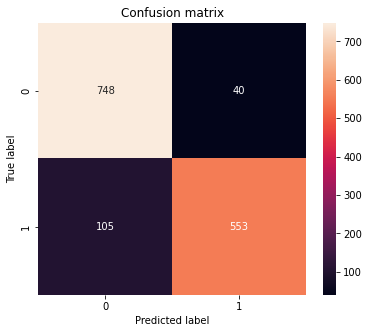

In [190]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm_idf = metrics.confusion_matrix(y_test, pred_idf) 

plt.figure(figsize=(6,5))
sns.heatmap(cm_idf, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

In [191]:
labels = pd.DataFrame({"Acutual_label":y_test,"Pred_label":pred_idf})
Output = pd.concat([X_test.iloc[:,:4],labels],axis =1)
Output

,id,title,author,text,Acutual_label,Pred_label
1300,1497,CLINTON CASH 3.0: Chelsea Clinton Being Groome...,Geoffrey Grider,CLINTON CASH 3.0: Chelsea Clinton Being Groo...,1,1
2578,2953,Virgil: The Deep State Strikes Again with Rach...,Virgil,"A few days ago, under the headline, âThe Dep...",0,0
1332,1534,"Not Just Hillary, Entire Obama Administration ...",The Free Thought Project,\nBy Jack Burns\nWikileaks is helping Presiden...,1,1
3669,4198,BREAKING: Honey G Fatally Gunned Down In Bitte...,Colm Williamson,We Use Cookies: Our policy [X] BREAKING: Honey...,1,0
1246,1437,Want to See âHamiltonâ in a City Near You?...,Michael Paulson,"âHamiltonâ is about to hit the road. And, ...",0,0
...,...,...,...,...,...,...
2709,3102,"Iran Warns Trump Over Missile Dispute, and Ame...",Somini Sengupta and Rick Gladstone,UNITED NATIONS â Already furious over Pre...,0,0
385,443,What Does a Trump Victory Mean for Africa?,Patrick Bond,2016 elections by Patrick Bond \nDonald Trump ...,1,1
3193,3669,E-pasaportes: consultora estrella justificÃ³ d...,Herbert Mujica Rojas,SeÃ±al de Alerta\nE-pasaportes: consultora est...,1,1
3755,4293,Dakota Access Announces Plan to Drill Under Mi...,Danny F. Quest,"We Are Change \nOceti Sakowin, ND â As water...",1,1
